In [1]:
from sklearn.datasets.samples_generator import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, bias=30, random_state=200)
m = 200

C:\Users\pope\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


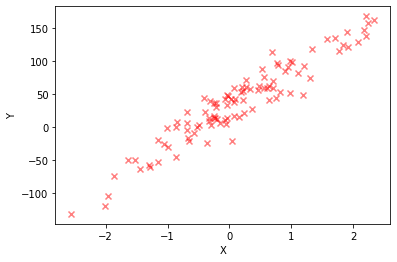

In [2]:
from matplotlib import pyplot as plt
plt.scatter(X,y, c = "red",alpha=.5, marker = 'x')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Linear Model

In [3]:
import numpy as np
def h(X,theta):
    return (theta[1]*np.array(X[:,0])+theta[0])

# Cost Function

In [4]:
def cost(theta,X,y):
    return (.5/m) * np.sum(np.square(h(X,theta)-np.array(y)))

# Gradient Descent

In [5]:
# Primera parte de la derivada
def grad(theta,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X,theta)-np.array(y))
    g[1] = (1/m) * np.sum((h(X,theta)-np.array(y))*np.array(X[:,0]))
    return g

In [6]:
def descent(theta_new, theta_prev, alpha):
    print(theta_prev)
    print(cost(theta_prev,X,y))
    j=0
    while True:
        theta_prev = theta_new
        theta0 = theta_prev[0] - alpha*grad(theta_prev,X,y)[0]
        theta1 = theta_prev[1] - alpha*grad(theta_prev,X,y)[1]
        theta_new = [theta0, theta1]
        print(theta_new)
        print(cost(theta_new,X,y))
        if (theta_new[0]-theta_prev[0])**2 + (theta_new[1]-theta_prev[1])**2 <= pow(10,-6):
            return theta_new
        if j>500: 
            return theta_new
        j+=1

# Parametro Theta aleatorio

In [7]:
theta = [0,-1]

# Entrenando el modelo

In [8]:
theta = descent(theta,theta,.1)
print(theta)

[0, -1]
1317.2904172444776
[1.8827719406973284, 2.333387745150387]
1175.0981975133816
[3.64699225899868, 5.4714911382332785]
1049.3610424146793
[5.300018757229467, 8.425811211982545]
938.1728918142932
[6.848757116472642, 11.207168907251749]
839.8486312343045
[8.299688483479606, 13.82574541369981]
752.8984665300572
[9.65889538278895, 16.291120111978014]
676.005271808339
[10.932086055358715, 18.612306260276963]
608.0045655033324
[12.12461731890634, 20.79778455957179]
547.8668095876664
[13.241516039406866, 22.855534723892333]
494.6817623050861
[14.287499297802261, 24.7930651744117]
447.6446461091801
[15.266993330902075, 26.61744096906301]
406.04392015663655
[16.184151320688454, 28.335310072733304]
369.25047115565894
[17.04287010175859, 29.952928066820466]
336.708057983377
[17.84680585242748, 31.476181391049586]
307.924864590029
[18.5993888310574, 32.91060920490733]
282.46603259372057
[19.30383721546242, 34.26142395084552]
259.9470598952215
[19.96317009974211, 35.53353069650849]
240.027964

# Visualizacion del modelo linear

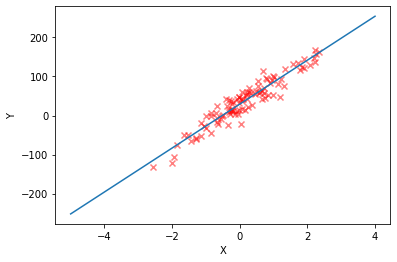

In [9]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return theta[0]+theta[1]*x

plt.scatter(X,y, c = "red",alpha=.5, marker = 'x')
graph(my_formula, range(-5,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()